#   CIFAR-10

###Q2 - Lets Train A simple model 


After all the data exploration we did, let see how out data augmantation strategy will hold.
We will start with a simple NN just like we started in the class.
Lets split the train data to train and validation 


In [4]:
#run
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#run
import numpy as np

train_X = np.load('./gdrive/My Drive/Work-1/CIFAR/data/data_X.npy')
train_Y = np.load('./gdrive/My Drive/Work-1/CIFAR/data/data_Y_categorial.npy')
#test_X = np.load('./gdrive/My Drive/Work-1/CIFAR/data/test_X.npy')
#test_Y = np.load('./gdrive/My Drive/Work-1/CIFAR/data/test_y.npy')

Lets load the Trainig data to train and validation.
The data have been normalized in Q-1


In [0]:
train_X.shape

(50000, 32, 32, 3)

Lest extract the test from Kaggle , normalize it and save it as an np array to predict our models with ease.


In [0]:
#! 7z x -o'./gdrive/My Drive/Work-1/CIFAR/data/test' './gdrive/My Drive/Work-1/CIFAR/data/test.7z'


In [0]:
from scipy import misc
from PIL import Image
import numpy as np

def normalize_data(data):
  for i in range(data.shape[0]):
    min = np.min(data[i])
    max = np.max(data[i])
    data[i] = (data[i]-min) / (max-min)
  return data

def kaggle_test_to_npy():
  filelist = []
  for i in range(1,300001):
      filelist.append('./gdrive/My Drive/Work-1/CIFAR/data/test/test/{}.png'.format(i))

  x = np.array([np.array(Image.open(fname)) for fname in filelist])
  x= x.astype(np.float32)

  x= normalize_data(x)
  np.save('./gdrive/My Drive/Work-1/CIFAR/data/kaggle_test_normalized.npy',x)


  kaggle_test_to_npy()

As we saw in Q1 the data is well balanced so we can use simple split to test and validation

In [0]:
#run
from sklearn.model_selection import train_test_split

Xtrain, Xval, Ytrain, Yval = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)

In [0]:
Xtrain.shape

(40000, 32, 32, 3)

In [0]:
np.save('./gdrive/My Drive/Work-1/CIFAR/data/splited_data/val_X.npy',Xval)
np.save('./gdrive/My Drive/Work-1/CIFAR/data/splited_data/val_Y.npy',Yval)
np.save('./gdrive/My Drive/Work-1/CIFAR/data/splited_data/train_X.npy',Xtrain)
np.save('./gdrive/My Drive/Work-1/CIFAR/data/splited_data/train_Y.npy',Ytrain)


As we can see this data set is perfectly balanced 

Lets create a simple Neural network and see how it perform



In [6]:
#run
import keras
import keras.models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
#run
num_classes = 10
nrow,ncol, channels = (32,32,3)
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3),input_shape=(nrow,ncol,channels)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.summary()
    return model

In [0]:
#run
from keras.callbacks import *

def set_callbacks(description='normal', path = '/', patience=32):
    #@cp = ModelCheckpoint(path + 'best_model_weights_'+ description + '.hdf5',save_best_only=True)
    es = EarlyStopping(patience=patience,monitor='acc')   
    log = CSVLogger(path + 'train_log.csv')
    tb = TensorBoard(log_dir=path + 'logs/')
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_acc',factor=0.1, patience=16, verbose=1, epsilon=1e-3,
                                      mpde='min')
    cb = [es,log,tb,reduce_lr_loss]
    return cb
#set_callbacks()

In [0]:
#run
from datetime import datetime
def get_model_path_and_name():
  base_path = './gdrive/My Drive/Work-1/CIFAR/models/'
  model_path =str(datetime.now()) 
  return [base_path+model_path+'/', model_path]


In [0]:
import os
#def save_and_eval(model)
path,name=get_model_path_and_name()
os.makedirs(path)
#model.save(path+name+'.h5')

In [0]:
import matplotlib.pyplot as plt

def model_accuracy(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  return plt

def model_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  return plt
  

In [0]:

num_of_epochs = 40

model = create_model()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(Xtrain,Ytrain,validation_data=[Xval,Yval],epochs=num_of_epochs,batch_size=64,
                                           callbacks = set_callbacks(path))
model.save(path+name+'.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 11s 263us/step - loss: 1.5549 - acc: 0.4389 - val_loss: 1.3779 - val_acc: 0.5523
Epoch 2/40
40000/40000 [==============================] - 8s 189us/step - loss: 1.2319 - acc: 0.5649 - val_loss: 1.2754 - val_acc: 0.5996
Epoch 3/40
40000/40000 [==============================] - 8s 188us/step - loss: 1.0935 - acc: 0.6152 - val_loss: 1.1307 - val_acc: 0.6290
Epoch 4/40
40000/40000 [==============================] - 7s 187us/step - loss: 0.9947 - acc: 0.6478 - val_loss: 1.0552 - val_acc: 0.6489
Epoch 5/40
40000/40000 [==============================] - 7s 186us/step - loss: 0.9183 - acc: 0.6768 - val_loss: 1.0548 - val_acc: 0.6389
Epoch 6/40
40000/40000 [==============================] - 8s 189us/step - loss: 0.8592 - acc: 0.6966 - val_loss: 0.9801 - val_acc: 0.6667
Epoch 7/40
40000/40000 [==============================] - 8s 189us/step - loss: 0.8049 - acc: 0.7159 - val_loss: 0.9823 -

In [0]:
plt1 = model_accuracy(history)
plt2 = model_loss(history)

lets evaluate this model : 


In [0]:
def predict_and_save(model_path,model_name,test_file,save_path ):
    x = np.load(test_file)
    model = models.load_model(model_path+model_name)
    pred = model.predict(x)
    p = pred.argmax(axis=1)
    with open(save_path,'w') as f:
        f.write('id,label\n')
        for i in range(1,300001):
            f.write('{},{}\n'.format(i,num_to_labels[p[i-1]]))
    del model
    del x
    del pred
    del p
  
    
    

In [0]:
from google.colab import files

uploaded = files.upload()

Saving first_check_place.png to first_check_place.png
Saving first_check_score.png to first_check_score.png


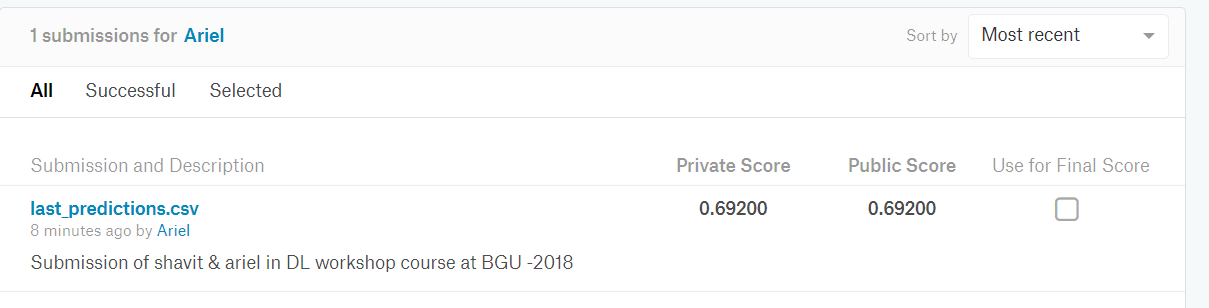

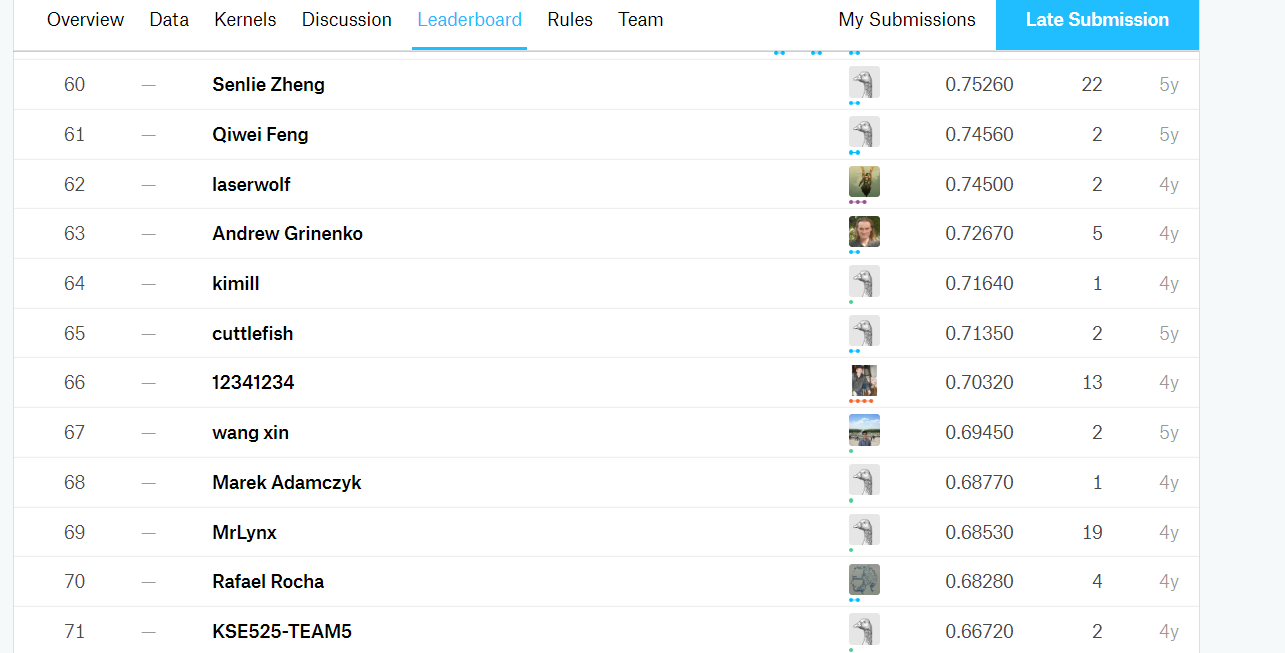

In [0]:
from IPython.display import Image, display

display(Image('first_check_score.png'))
display(Image('first_check_place.png'))



## score of 0.692 of the first try  - thats 67 place in kaggle

lets try again with Data augmantation 

# New Section

In [8]:
#run
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

tf.set_random_seed(42)
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
#run
def train_with_aug(datagen,path,name,epochs,two=1):
    #datagen.fit(Xtrain)
    if two==1:
      model = create_model()
    else:
      model = create_model_2()
    Batch_size=32
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.fit_generator(datagen.flow(Xtrain,Ytrain,batch_size=Batch_size),
                        #batch_size=Batch_size,
                                             epochs = epochs,
                                          callbacks = set_callbacks(path),
                                          validation_data=(Xval, Yval),
                                          validation_steps = len(Xval)//Batch_size,
                                          steps_per_epoch = len(Xtrain)//Batch_size)
    model.save(path+name+'.h5')
    return model

In [0]:

path,name=get_model_path_and_name()
name = 'with_dataGen'
os.makedirs(path)
shift = 0.5
BATCH_size=32
datagen = ImageDataGenerator(brightness_range=[0.6,1.5],rotation_range=10,
                            width_shift_range=shift, height_shift_range=shift,
                            fill_mode='nearest',horizontal_flip=True)
model = create_model()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit_generator(datagen.flow(Xtrain,Ytrain,batch_size=BATCH_size),
                                             epochs = 2,
                                          callbacks = set_callbacks(path),
                                          validation_data=(Xval, Yval),
                                          validation_steps = 1000,
                                          steps_per_epoch = len(Xtrain)/BATCH_size)
model.save(path+name+'.h5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Epoch 1/2
 6358/40000 [===>..........................] - ETA: 18:12 - loss: 14.4803 - acc: 0.1016

KeyboardInterrupt: ignored

We might overdid with the augmantation - the loss is segnificantly higher and the validation accuracy is not good Lets try with less augmantation and check the model again The problem might be because we didnt fit the datagenerator - lets add this change

In [0]:
#We ran this without restricting the batch size 
path,name=get_model_path_and_name()
name = 'with_dataGen'
os.makedirs(path)
shift = 0.1
datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=shift,
                             height_shift_range=shift,
                             horizontal_flip=True)
train_with_aug(datagen,path,name,25)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Epoch 1/25
1250/1250 [==============================] - 30s 24ms/step - loss: 1.6041 - acc: 0.4186 - val_loss: 1.4182 - val_acc: 0.4994
Epoch 2/25
1250/1250 [==============================] - 31s 24ms/step - loss: 1.3442 - acc: 0.5170 - val_loss: 1.2070 - val_acc: 0.5742
Epoch 3/25
1250/1250 [==============================] - 30s 24ms/step - loss: 1.2435 - acc: 0.5556 - val_loss: 1.1722 - val_acc: 0.6016
Epoch 4/25
1250/1250 [==============================] - 30s 24ms/step - loss: 1.1807 - acc: 0.5811 - val_loss: 1.0998 - val_acc: 0.6159
Epoch 5/25
1250/1250 [==============================] - 30s 24ms/step - loss: 1.1336 - acc: 0.5960 - val_loss: 1.1036 - val_acc: 0.6120
Epoch 6/25
1250/1250 [==============================] - 30s 24ms/step - loss: 1.1052 - acc: 0.6115 - val_loss: 1.0711 - val_acc: 0.6152
Epoch 7/25
1250/1250 [==============================] - 30s 24ms/step - loss: 1.0753 - acc: 0.6198 - val_loss: 1.0650 - val_acc: 0.6265
Epoch 8/25
1250/1250 [==========================

In [0]:
from google.colab import files

uploaded = files.upload()

## We scored 0.74 at kaggle 
that places us in 63 place 5 places diff with only two epochs.

lets reduce the batch size to backpropagate the gradients faster and converge faster 


In [0]:
path,name=get_model_path_and_name()
name = 'dataGen_96_epochs'
os.makedirs(path)
shift = 0.1
datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=shift,
                             height_shift_range=shift,
                             horizontal_flip=True)
train_with_aug(datagen,path,name,96)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Epoch 1/96
1250/1250 [==============================] - 35s 28ms/step - loss: 1.5979 - acc: 0.4217 - val_loss: 1.3794 - val_acc: 0.5389
Epoch 2/96
1250/1250 [==============================] - 34s 27ms/step - loss: 1.3494 - acc: 0.5153 - val_loss: 1.2106 - val_acc: 0.5961
Epoch 3/96
1250/1250 [==============================] - 33s 26ms/step - loss: 1.2434 - acc: 0.5569 - val_loss: 1.1181 - val_acc: 0.6236
Epoch 4/96
1250/1250 [==============================] - 32s 26ms/step - loss: 1.1848 - acc: 0.5813 - val_loss: 1.0606 - val_acc: 0.6387
Epoch 5/96
1250/1250 [==============================] - 31s 25ms/step - loss: 1.1352 - acc: 0.5962 - val_loss: 1.0438 - val_acc: 0.6402
Epoch 6/96
1250/1250 [==============================] - 34s 27ms/step - loss: 1.0930 - acc: 0.6117 - val_loss: 1.0243 - val_acc: 0.6413
Epoch 7/96
1250/1250 [==============================] - 34s 27ms/step - loss: 1.0617 - acc: 0.6234 - val_loss: 0.9973 - val_acc: 0.6516
Epoch 8/96
1250/1250 [==========================

In [0]:
predict_and_save('./gdrive/My Drive/Work-1/CIFAR/datagen_96/','dataGen_96_epochs.h5','./gdrive/My Drive/Work-1/CIFAR/data/kaggle_test_normalized.npy','./gdrive/My Drive/Work-1/CIFAR/datagen_96/sub.csv' )

It seems that the model Reached its maximum potentioal - the train accuracy and loss appears to stay the same at the end. 
lets try to add some more variables to the model in order to learn better our data

In [0]:
def create_model_2():
    num_classes=10
    nrow,ncol, channels = (32,32,3)
    model = Sequential()
    model.add(Conv2D(64, (3, 3),input_shape=(nrow,ncol,channels),activation = 'relu'))
    model.add(Conv2D(64, (3, 3),activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3),input_shape=(nrow,ncol,channels),activation = 'relu'))
    model.add(Conv2D(64, (3, 3),activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3),activation = 'relu'))
    model.add(Conv2D(32, (3, 3),activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.summary()
    return model


In [28]:
path,name=get_model_path_and_name()
name = 'dataGen_96_epochs_model_2'
os.makedirs(path)
shift = 0.1
datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=shift,
                             height_shift_range=shift,
                             horizontal_flip=True)
train_with_aug(datagen,path,name,96,2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
dropout_21 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 10, 10, 32)        18464     
__________

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Epoch 1/96
1250/1250 [==============================] - 37s 30ms/step - loss: 1.7472 - acc: 0.3552 - val_loss: 1.4529 - val_acc: 0.4671
Epoch 2/96
1250/1250 [==============================] - 36s 29ms/step - loss: 1.4251 - acc: 0.4824 - val_loss: 1.3378 - val_acc: 0.5304
Epoch 3/96
1250/1250 [==============================] - 36s 29ms/step - loss: 1.2778 - acc: 0.5372 - val_loss: 1.2086 - val_acc: 0.5781
Epoch 4/96
1250/1250 [==============================] - 36s 29ms/step - loss: 1.1753 - acc: 0.5768 - val_loss: 1.0391 - val_acc: 0.6270
Epoch 5/96
1250/1250 [==============================] - 37s 29ms/step - loss: 1.1088 - acc: 0.6041 - val_loss: 0.9910 - val_acc: 0.6439
Epoch 6/96
1250/1250 [==============================] - 36s 29ms/step - loss: 1.0493 - acc: 0.6263 - val_loss: 0.9636 - val_acc: 0.6577
Epoch 7/96
1250/1250 [==============================] - 36s 29ms/step - loss: 1.0053 - acc: 0.6407 - val_loss: 0.9310 - val_acc: 0.6707
Epoch 8/96
1250/1250 [==========================

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss
import seaborn as sns
import numpy as np
##
test_X = np.load('./gdrive/My Drive/Work-1/CIFAR/data/test_X.npy')
test_Y = np.load('./gdrive/My Drive/Work-1/CIFAR/data/test_y.npy')
test_Y=test_Y.argmax(axis=1)

def preds_confusion(path,text):
  model = keras.models.load_model(path)
  pred_cat = model.predict(test_X).argmax(axis=1)
  
  indices = [i for i,v in enumerate(pred_cat) if pred_cat[i]!=test_Y[i] and pred_cat[i]==3 and test_Y[i]==5]
  subset_of_wrongly_predicted = [test_X[i] for i in indices ]
  
  print(confusion_matrix(test_Y,pred_cat))
  print(accuracy_score(test_Y,pred_cat))
  sns.heatmap(confusion_matrix(test_Y,pred_cat),cmap='Greens',annot=True, fmt='d')
  plt.xlabel('Prediction')
  plt.ylabel('True label')
  plt.title(text+'\n classification results on test set')
  return [plt ,subset_of_wrongly_predicted]

[[723  14  61  21  31  11  24   8  82  25]
 [ 19 799  17  12   7   5  20   4  49  68]
 [ 53   5 600  65 124  34  82  17  17   3]
 [ 15   4  84 508 103 122 115  19  18  12]
 [ 15   1  75  56 709  23  79  30  12   0]
 [  8   1  80 201  83 512  57  45  11   2]
 [  7   4  41  37  42  11 848   4   6   0]
 [ 12   3  48  57 126  49  14 681   8   2]
 [ 47  29  22  25   7   4  10   4 841  11]
 [ 39  86  20  35  11  14  22  19  55 699]]
0.692


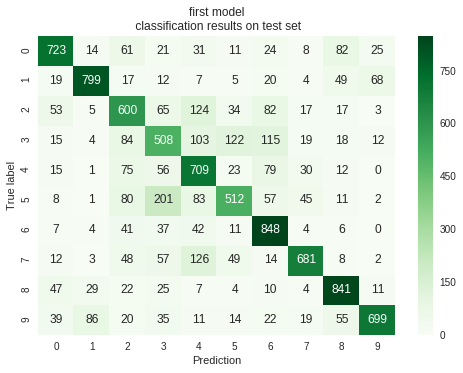

[array([[[0.336, 0.064, 0.148],
         [0.328, 0.064, 0.144],
         [0.32 , 0.056, 0.136],
         ...,
         [0.368, 0.34 , 0.228],
         [0.324, 0.32 , 0.204],
         [0.34 , 0.332, 0.22 ]],
 
        [[0.336, 0.052, 0.14 ],
         [0.328, 0.052, 0.136],
         [0.328, 0.052, 0.136],
         ...,
         [0.284, 0.192, 0.144],
         [0.364, 0.324, 0.204],
         [0.46 , 0.404, 0.244]],
 
        [[0.348, 0.056, 0.144],
         [0.348, 0.06 , 0.148],
         [0.352, 0.064, 0.156],
         ...,
         [0.228, 0.08 , 0.08 ],
         [0.4  , 0.328, 0.208],
         [0.492, 0.456, 0.296]],
 
        ...,
 
        [[0.772, 0.956, 0.888],
         [0.772, 0.94 , 0.88 ],
         [0.788, 0.94 , 0.884],
         ...,
         [0.72 , 0.888, 0.8  ],
         [0.704, 0.88 , 0.788],
         [0.736, 0.908, 0.82 ]],
 
        [[0.788, 0.952, 0.892],
         [0.78 , 0.936, 0.88 ],
         [0.792, 0.948, 0.888],
         ...,
         [0.716, 0.884, 0.796],
       

In [15]:
plt,subset_of_wrongly_predicted = preds_confusion('./gdrive/My Drive/Work-1/CIFAR/models/first_model/first.h5',
                     'first model')
plt.show()
subset_of_wrongly_predicted


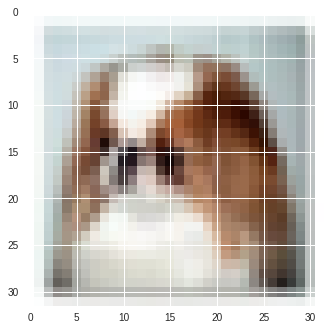

In [16]:
plt.imshow(subset_of_wrongly_predicted[2])

[[840  20  24   8  12   0  11  11  38  36]
 [  6 915   2   2   0   1   5   1   9  59]
 [ 79   8 638  28  58  30 118  21  10  10]
 [ 19   9  36 548  62 112 137  34  25  18]
 [ 13   1  27  27 781   9  96  41   1   4]
 [  4   3  27 103  47 674  74  58   5   5]
 [  7   1  11  14  10   4 943   4   5   1]
 [ 14   5  16  22  42  20  27 840   1  13]
 [ 43  24   5   1   1   0   5   5 884  32]
 [ 11  30   2   2   0   0   5   3   8 939]]
0.8002


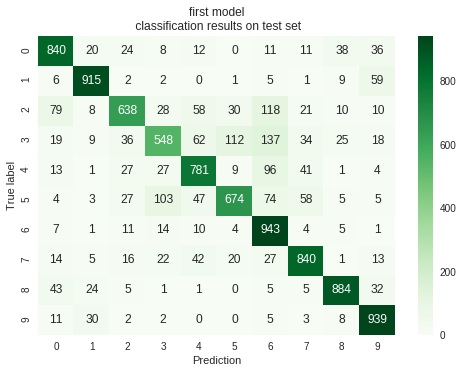

[array([[[0.49773756, 0.48868778, 0.4162896 ],
         [0.5248869 , 0.520362  , 0.4524887 ],
         [0.5565611 , 0.561086  , 0.479638  ],
         ...,
         [0.64705884, 0.65158373, 0.5656109 ],
         [0.5520362 , 0.5656109 , 0.44343892],
         [0.24886878, 0.2760181 , 0.1764706 ]],
 
        [[0.520362  , 0.51583713, 0.4524887 ],
         [0.49321267, 0.5022625 , 0.42533937],
         [0.53846157, 0.54298645, 0.45701358],
         ...,
         [0.6651584 , 0.67420816, 0.5701358 ],
         [0.5565611 , 0.57918555, 0.43438914],
         [0.25791857, 0.28959277, 0.1764706 ]],
 
        [[0.5294118 , 0.5248869 , 0.45701358],
         [0.4524887 , 0.46606335, 0.37104073],
         [0.49321267, 0.50678736, 0.40271494],
         ...,
         [0.67420816, 0.6877828 , 0.57918555],
         [0.57918555, 0.60181   , 0.46153846],
         [0.26696834, 0.29864255, 0.19004525]],
 
        ...,
 
        [[0.54751134, 0.6606335 , 0.280543  ],
         [0.54751134, 0.64253396, 0.28506

In [17]:
plt,subset_of_wrongly_predicted = preds_confusion('./gdrive/My Drive/Work-1/CIFAR/models/Q2-final/dataGen_96_epochs_model_2.h5',
                     'first model')
plt.show()
subset_of_wrongly_predicted